# **Machine Learning Project - Music Genre Prediction :**
- ### Write a program that takes in data on music tracks as input and uses unsupervised machine learning algorithms to predict the genre of each track.

- ### Your task is to choose an appropriate unsupervised algorithm for predicting genres based on the available data. You can use metrics such as silhouette score or inertia value to evaluate the performance of your model.
---
# Importing necessary libraries :

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Loading the data :

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine Learning Projects/Datasets/music-data.csv')
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


# Checking basic information about the data :

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [ ]:
data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [ ]:
data.shape

(1000, 30)

In [ ]:
data.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

# Checking missing values :

In [ ]:
data.isnull().sum().sum()

0

# Preparing our features (x) :

In [ ]:
features = ['tempo', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'rmse',
            'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10']
x = data[features]

# Create a pipeline for scaling, feature selection, and dimensionality reduction

In [ ]:
preprocessor = Pipeline([
    ('scaler', StandardScaler()),  # or MinMaxScaler() - Experiment with different scalers
    ('feature_selection', SelectKBest(f_classif, k=10)),  # Select top 10 features
    ('dim_reduction', PCA(n_components=0.95))  # or FastICA(n_components=10) - Experiment with different methods
])

# Applying preprocessing :

In [ ]:
x_processed = preprocessor.fit_transform(x, data['label'])  # Including target for feature selection

# Determining optimal number of clusters using silhouette score and inertia :

In [ ]:
best_n_clusters = 2
best_silhouette_score = -1
best_inertia = float('inf')

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init=10)  # Improved initialization
    cluster_labels = kmeans.fit_predict(x_processed)
    silhouette_avg = silhouette_score(x_processed, cluster_labels)
    inertia = kmeans.inertia_

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters
    if inertia < best_inertia:
            best_inertia = inertia

print(f"Optimal Number of Clusters (Silhouette): {best_n_clusters}")

Optimal Number of Clusters (Silhouette): 3


# Applying KMeans with the optimal number of clusters

In [ ]:
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, init='k-means++', n_init=10)  # Improved initialization
cluster_labels = kmeans.fit_predict(x_processed)

# Adding predicted genre labels to the DataFrame :

In [ ]:
data['predicted_genre'] = cluster_labels

# Visualization with PCA :

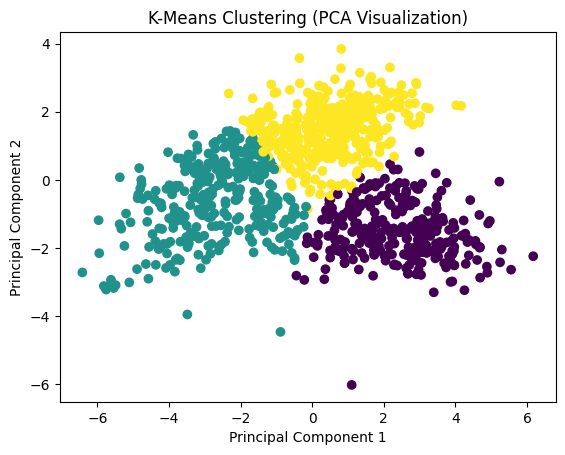

In [ ]:
plt.scatter(x_processed[:, 0], x_processed[:, 1], c=cluster_labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('K-Means Clustering (PCA Visualization)')
plt.show()

# Evaluating the model using silhouette score and inertia :

In [ ]:
silhouette_avg = silhouette_score(x_processed, cluster_labels)
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia: {inertia}")

Silhouette Score: 0.3502182035811976
Inertia: 4017.5983247561944
